# 220968280 - Anirudh Swaminathan - DSE A2

## Week 5 - Exercise 1 - decision trees and random forest on play_tennis.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree

### 1. decision tree

In [2]:
df = pd.read_csv('play_tennis.csv')
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes


In [3]:
string_to_int= preprocessing.LabelEncoder()
df=df.apply(string_to_int.fit_transform)
df.head()

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1


In [4]:
feature_cols = ['Outlook','Temperature','Humidity','Wind']
X = df[feature_cols]
y = df['Play Tennis']
y = pd.DataFrame(y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.4444444444444444, 0.9, 'Outlook <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]\nclass = l'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = l'),
 Text(0.5555555555555556, 0.7, 'Humidity <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]\nclass = P'),
 Text(0.3333333333333333, 0.5, 'Outlook <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = P'),
 Text(0.2222222222222222, 0.3, 'Wind <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = P'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = P'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = l'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = P'),
 Text(0.7777777777777778, 0.5, 'Wind <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = l'),
 Text(0.6666666666666666, 0.3, 'Outlook <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = P'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\

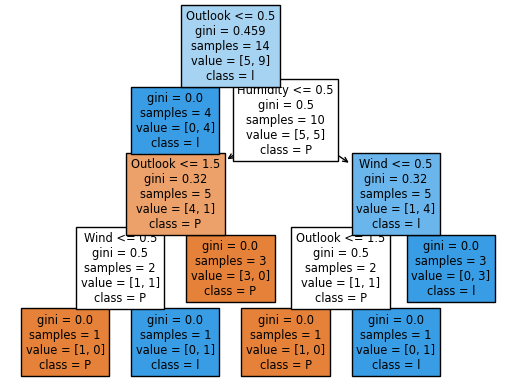

In [7]:
tree.plot_tree(clf,feature_names=feature_cols,class_names='Play Tennis',filled=True)

In [8]:
with open('dt1_tennis.txt',"w") as f:
    f = tree.export_graphviz(clf, out_file=f, 
                                feature_names=feature_cols,  
                                class_names='Play Tennis',
                                filled=True)


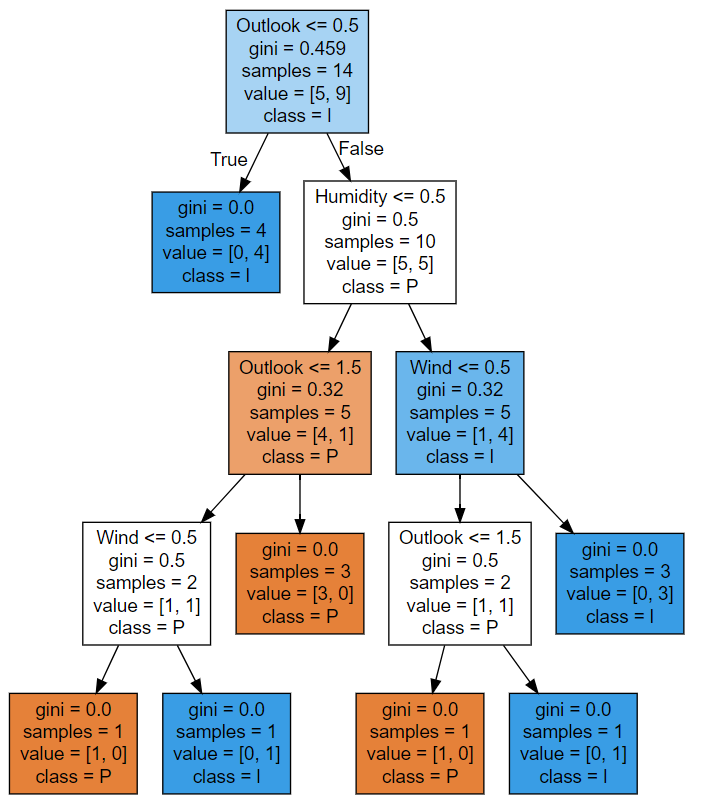

### 2. random forest classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

C:\Users\mca\AppData\Local\Temp\ipykernel_12196\71670089.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)


RandomForestClassifier(max_depth=2, random_state=0)

[Text(0.5, 0.75, 'Outlook <= 1.5\ngini = 0.408\nsamples = 7\nvalue = [4, 10]\nclass = l'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 10]\nclass = l'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [4, 0]\nclass = P')]

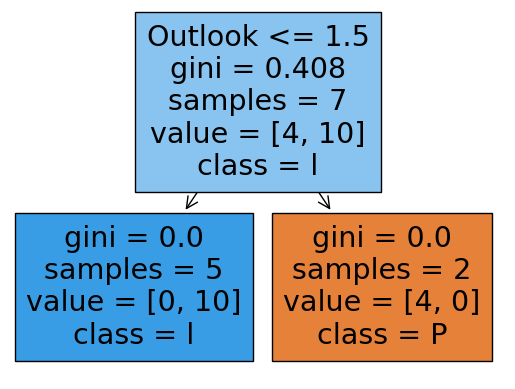

In [11]:
tree.plot_tree(clf.estimators_[0],feature_names=feature_cols,class_names='Play Tennis',filled=True)

In [12]:
with open('dt2_tennis.txt',"w") as f:
    f = tree.export_graphviz(clf.estimators_[0], out_file=f, 
                                feature_names=feature_cols,  
                                class_names='Play Tennis',
                                filled=True)

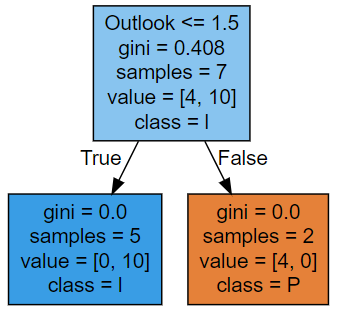